In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/mini_project/train3.csv',encoding='ISO-8859-1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [ ]:
df.head()                                              #head command gives the first 5 lines of our dataset

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [ ]:
df.tail()                                             #tail command gives the last 5 lines of our dataset

,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


In [ ]:
df.shape                                           #rows and columns of dataset

(99989, 3)

In [ ]:
df.columns.tolist                                 #column names

<bound method IndexOpsMixin.tolist of Index(['ItemID', 'Sentiment', 'SentimentText'], dtype='object')>

In [ ]:
df.dtypes

ItemID            int64
Sentiment         int64
SentimentText    object
dtype: object

In [ ]:
count=[]
count.append(int(df.Sentiment.value_counts()[1]))
count.append(int(df.Sentiment.value_counts()[0]))

In [ ]:
print(count)

[56457, 43532]


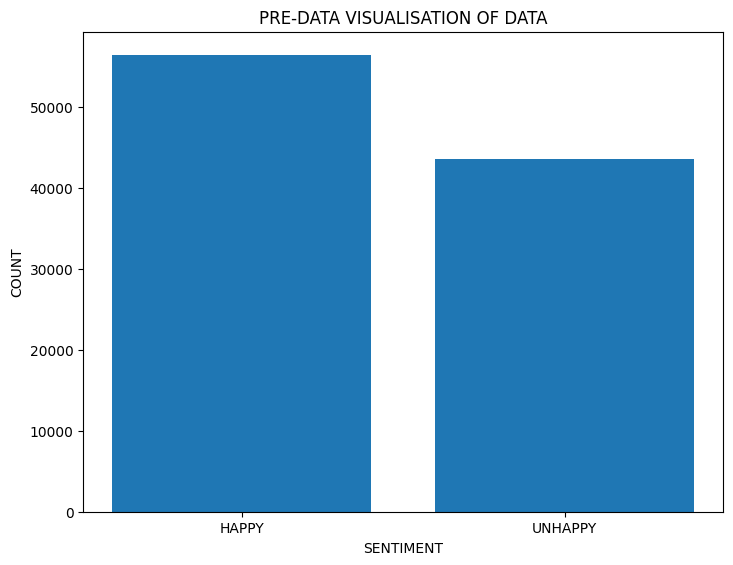

In [ ]:
#PRE-DATA VISULAISATION - Graphical representation of data
fig1=plt.figure()
axes=fig1.add_axes([0,0,1,1])
label=['HAPPY','UNHAPPY']
axes.bar(label,count)
plt.xlabel("SENTIMENT")
plt.ylabel("COUNT")
plt.title("PRE-DATA VISUALISATION OF DATA")
plt.show()

In [ ]:
#DATA PREPROCESSING
#TOKENIZATION OF TEXT
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize

In [ ]:
preprocess1=[]
for each_row in range(df.shape[0]):
    text=df['SentimentText'].values[each_row]
    ctext=str(text)
    regex=re.sub('[^A-Za-z0-9!?]', ' ', ctext)
    preprocess1.append(regex)
df["Preprocessed_1"]=preprocess1

In [ ]:
df[['Preprocessed_1']]

,Preprocessed_1
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already 7 30 O
3,Omgaga Im sooo im gunna CRy I ...
4,i think mi bf is cheating on me!!! ...
...,...
99984,Cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,CuPcAkE 2120 ya i thought so
99987,Cupcake Dollie Yes Yes I m glad you had mor...


In [ ]:
preprocess2=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_1'].values[each_row]
    ctext_p1=str(text)
    regex_p1=re.sub('[^A-Za-z]', ' ', ctext_p1)
    preprocess2.append(regex_p1)
df["Preprocessed_2"]=preprocess2

In [ ]:
df[['Preprocessed_2']]

,Preprocessed_2
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already O
3,Omgaga Im sooo im gunna CRy I ...
4,i think mi bf is cheating on me ...
...,...
99984,Cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,CuPcAkE ya i thought so
99987,Cupcake Dollie Yes Yes I m glad you had mor...


In [ ]:
#no need
preprocess3=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_2'].values[each_row]
    ctext_p2=str(text)
    regex_p2=ctext_p2.lower()
    preprocess3.append(regex_p2)
df["Preprocessed_3"]=preprocess3

In [ ]:
df[['Preprocessed_3']]

,Preprocessed_3
0,is so sad for my apl frie...
1,i missed the new moon trail...
2,omg its already o
3,omgaga im sooo im gunna cry i ...
4,i think mi bf is cheating on me ...
...,...
99984,cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,cupcake ya i thought so
99987,cupcake dollie yes yes i m glad you had mor...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
stopwords_list=stopwords.words('english')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
preprocess4=[]
for each_row in range(df.shape[0]):
    text=df["Preprocessed_3"].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        if not each_word in stopwords_list:
            clean_words.append(each_word)
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess4.append(dre)
df['Preprocessed_4']=preprocess4

In [ ]:
df[['Preprocessed_4']]

,Preprocessed_4
0,sad apl friend
1,missed new moon trailer
2,omg already
3,omgaga im sooo im gunna cry dentist since supo...
4,think mi bf cheating
...,...
99984,cupcake seems like repeating problem hope able...
99985,cupcake arrrr replied different tweets time se...
99986,cupcake ya thought
99987,cupcake dollie yes yes glad fun


In [ ]:
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
preprocess_5=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_4'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        clean_words.append(lm.lemmatize(each_word))
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess_5.append(dre)
df['Preprocessed_5']=preprocess_5

In [ ]:
df[['Preprocessed_5']]

,Preprocessed_5
0,sad apl friend
1,missed new moon trailer
2,omg already
3,omgaga im sooo im gunna cry dentist since supo...
4,think mi bf cheating
...,...
99984,cupcake seems like repeating problem hope able...
99985,cupcake arrrr replied different tweet time see...
99986,cupcake ya thought
99987,cupcake dollie yes yes glad fun


In [ ]:
#removing empty rows
df=df[df['Preprocessed_5']!='']

In [ ]:
df.shape

(99985, 8)

In [ ]:
df[['Preprocessed_5']]

,Preprocessed_5
0,sad apl friend
1,missed new moon trailer
2,omg already
3,omgaga im sooo im gunna cry dentist since supo...
4,think mi bf cheating
...,...
99984,cupcake seems like repeating problem hope able...
99985,cupcake arrrr replied different tweet time see...
99986,cupcake ya thought
99987,cupcake dollie yes yes glad fun


In [ ]:
per=list()
df2 = pd.DataFrame()
df2['Clean Tweets']=df['Preprocessed_5']
df2['Sentiment']=df['Sentiment']

In [ ]:
df2

,Clean Tweets,Sentiment
0,sad apl friend,0
1,missed new moon trailer,0
2,omg already,1
3,omgaga im sooo im gunna cry dentist since supo...,0
4,think mi bf cheating,0
...,...,...
99984,cupcake seems like repeating problem hope able...,0
99985,cupcake arrrr replied different tweet time see...,1
99986,cupcake ya thought,0
99987,cupcake dollie yes yes glad fun,1


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=5a021d770ead2d44724b49d1c6d5d2dc5e48b2515d446c2aa214c94d497e13cb
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn


In [ ]:
#FEATURE EXTRACTION - Mapping from textual data into real valued vectors for making compatible with model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()        #Loading tfidf function to our variable

In [ ]:
#Fitting and transforming the vectorizer to our data
x=df2['Clean Tweets']
# print(df2)
vectorizer.fit(x)

x=vectorizer.transform(x)
print(x[0])   #Transforming all the text data and gives corresponding tf-idf value

  (0, 93674)	0.22523244176959206
  (0, 90542)	0.33719361940549114
  (0, 80817)	0.20078834049859604
  (0, 71938)	0.20751257559588177
  (0, 65503)	0.3930087153818444
  (0, 65062)	0.20497498406511383
  (0, 21665)	0.7454681676889592


In [ ]:
x.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,df2['Sentiment'],test_size=0.20,train_size=0.80)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
import functools
import sys
import matplotlib.pyplot as plt
import numpy as np


LOGISTIC REGRESSION

In [ ]:
class Logistic_Regression():
  # declaring learning rate & number of itserations (Hyperparametes)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations



  # fit function to train the model with dataset
  def fit(self, X, Y):
    # number of data points in the dataset (number of rows)  -->  m
    # number of input features in the dataset (number of columns)  --> n
    self.m, self.n = X.shape


    #initiating weight & bias value

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y


    # implementing Gradient Descent for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    # Y_hat formula (sigmoid function)

    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))


    # derivaties

    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))

    db = (1/self.m)*np.sum(Y_hat - self.Y)


    # updating the weights & bias using gradient descent

    self.w = self.w - self.learning_rate * dw

    self.b = self.b - self.learning_rate * db


  # Sigmoid Equation & Decision Boundary

  def predict(self, X):

    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) ))
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred

In [ ]:
classifier = Logistic_Regression(learning_rate=0.01, no_of_iterations=1000)

In [ ]:
print(type(x_train[0]))
classifier.fit(x_train.toarray()[:1000], y_train.to_numpy()[:1000])


<class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
y_pred2=classifier.predict(x_test)
print(y_pred2)

[1 1 1 ... 1 1 1]


In [ ]:
lrc1=accuracy_score(y_pred2,y_test)
lrc2=precision_score(y_pred2,y_test)
lrc3=recall_score(y_pred2,y_test)
lrc4=f1_score(y_pred2,y_test)

In [ ]:
print(lrc1,lrc2,lrc3,lrc4)

0.5642846426964044 1.0 0.5642846426964044 0.7214603113711199


In [ ]:

print(classifier.predict(x_test))



[1 1 1 ... 1 1 1]
